In [86]:
from modelo_lineal import ModeloLineal

In [87]:
data_path = './assets/proyecto_training_data.npy'
modelo = ModeloLineal(data_path, 0.80)

### Exploracion de datos

In [88]:
modelo.mostrar_medias()
print('----------------------------------')
modelo.mostrar_maximos()
print('----------------------------------')
modelo.mostrar_minimos()

Media SalePrice:  180590.27739726027
Media OverallQual:  6.101027397260274
Media 1stFlrSF:  1156.3236301369864
Media TotRmsAbvGrd:  6.4854452054794525
Media YearBuilt:  1971.451198630137
Media LotFrontage:  69.94698544698545
----------------------------------
Máximo SalePrice:  755000.0
Máximo OverallQual:  10.0
Máximo 1stFlrSF:  3228.0
Máximo TotRmsAbvGrd:  14.0
Máximo YearBuilt:  2010.0
Máximo LotFrontage:  313.0
----------------------------------
Mínimo SalePrice:  34900.0
Mínimo OverallQual:  1.0
Mínimo 1stFlrSF:  334.0
Mínimo TotRmsAbvGrd:  2.0
Mínimo YearBuilt:  1875.0
Mínimo LotFrontage:  21.0


In [89]:
modelo.mostrar_rangos()
print('----------------------------------')
modelo.mostrar_desviaciones()

Rango SalePrice:  720100.0
Rango OverallQual:  9.0
Rango 1stFlrSF:  2894.0
Rango TotRmsAbvGrd:  12.0
Rango YearBuilt:  135.0
Rango LotFrontage:  292.0
----------------------------------
Desviación Estandar SalePrice:  78815.69790179149
Desviación Estandar OverallQual:  1.3780252276191631
Desviación Estandar 1stFlrSF:  373.7803744886528
Desviación Estandar TotRmsAbvGrd:  1.6091407087243883
Desviación Estandar YearBuilt:  29.95170660645528
Desviación Estandar LotFrontage:  23.478160779049645


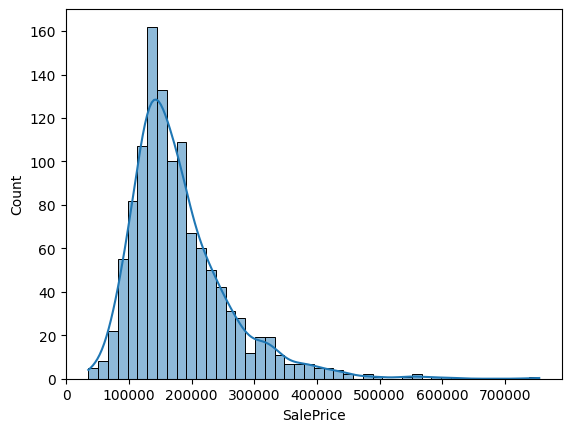

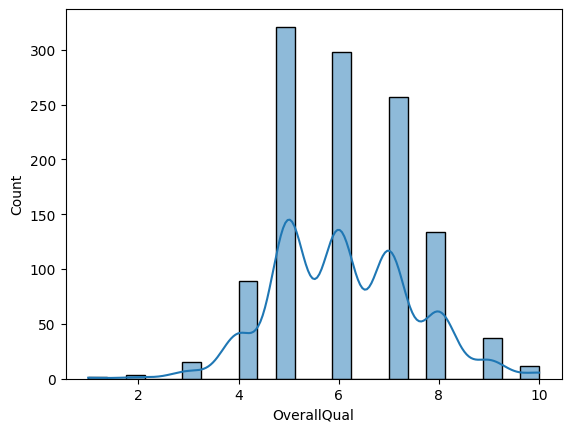

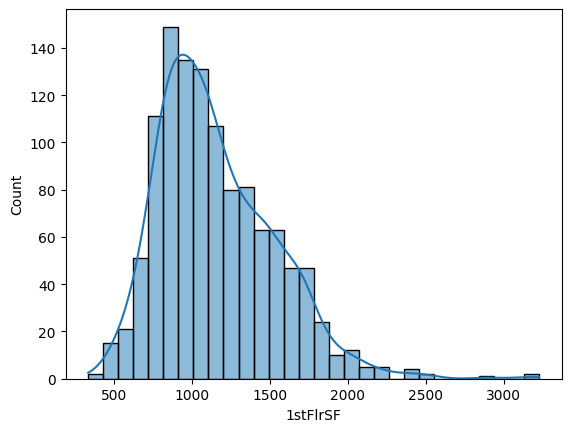

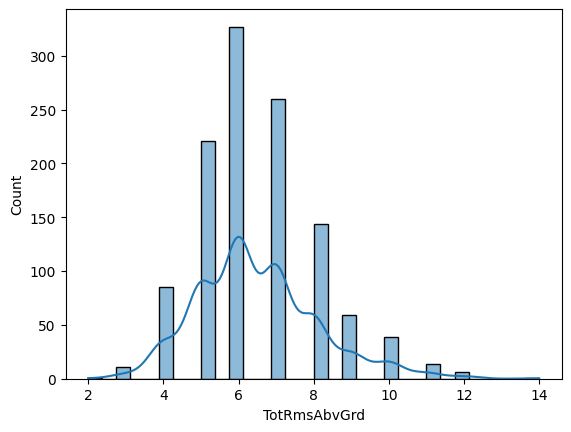

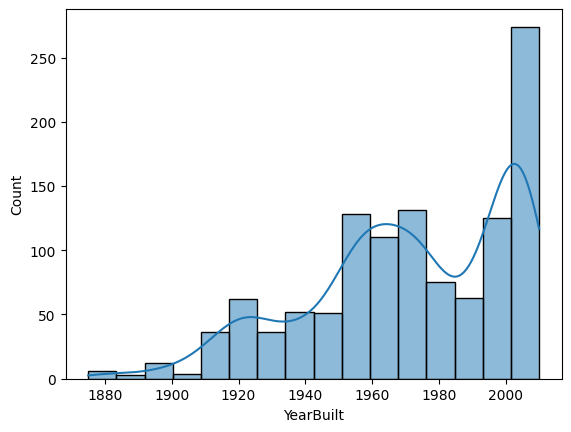

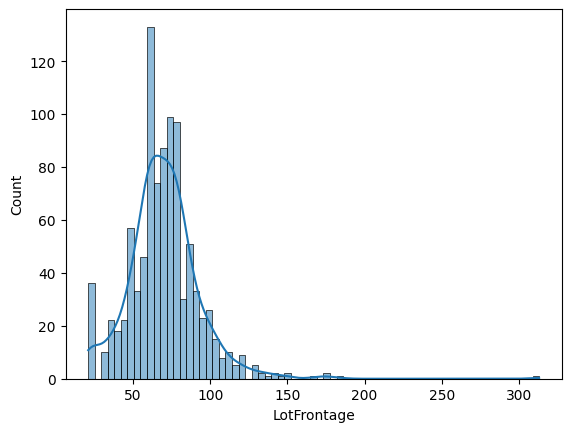

In [90]:
modelo.mostar_histogramas()

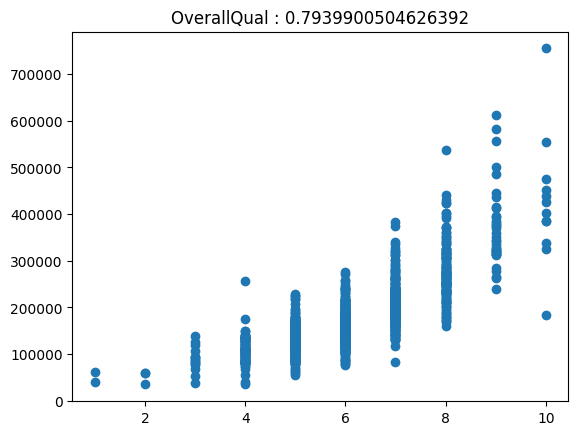

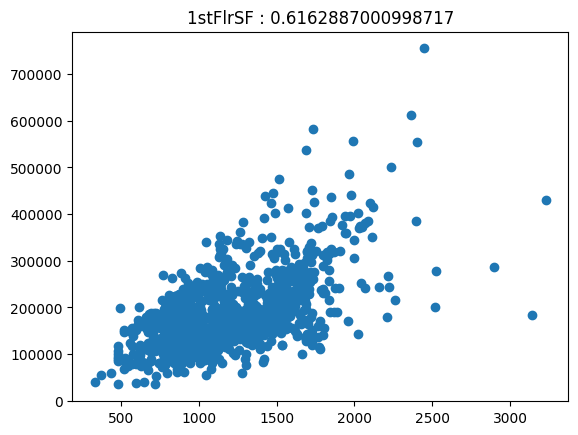

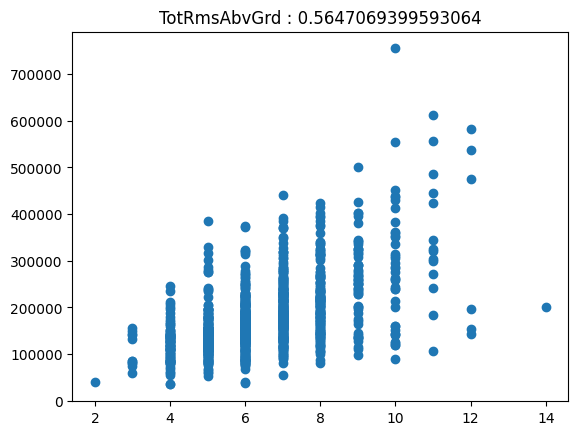

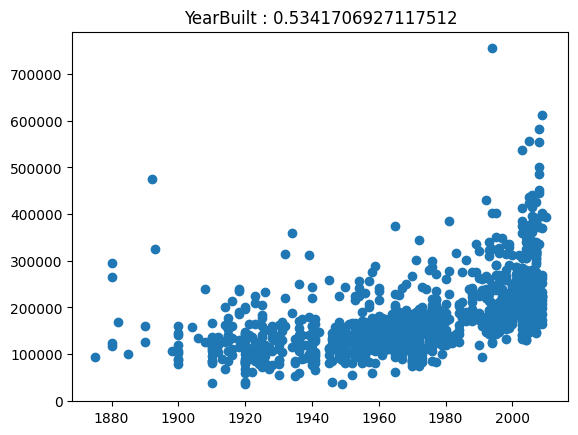

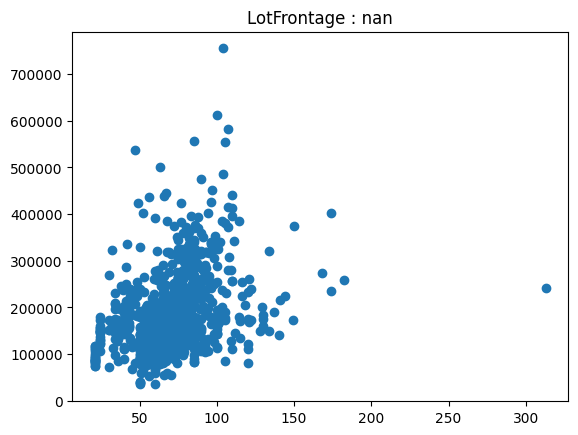

In [91]:
modelo.mostar_correlaciones()

#### Eleccion de variables
1. OverallQual
2. 1stFlrSF

### Entrenamiento de modelo con variable OverallQual

#### Manual

In [92]:
vector_x, vector_y = modelo.get_trainning_arrays('OverallQual')
modelo.set_betas(-40000, 35500)

In [93]:
betas, error = modelo.entrar_modelo(vector_x, vector_y, 1000000, 200000, -0.0000001)

El error es de: 1224188162.800056
El error es de: 1224058592.6553218
El error es de: 1223929239.774725
El error es de: 1223800103.7939632
El error es de: 1223671184.3493338


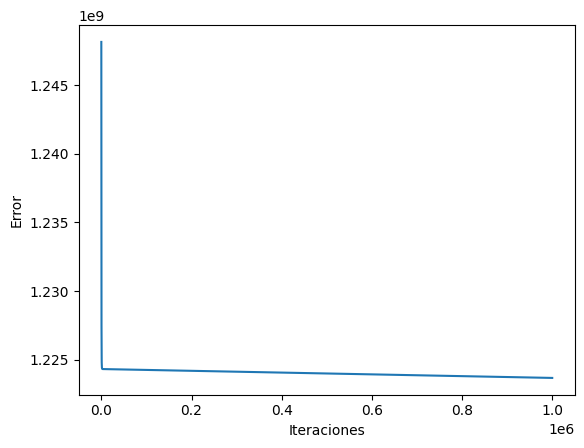

In [94]:
modelo.graficar_error()

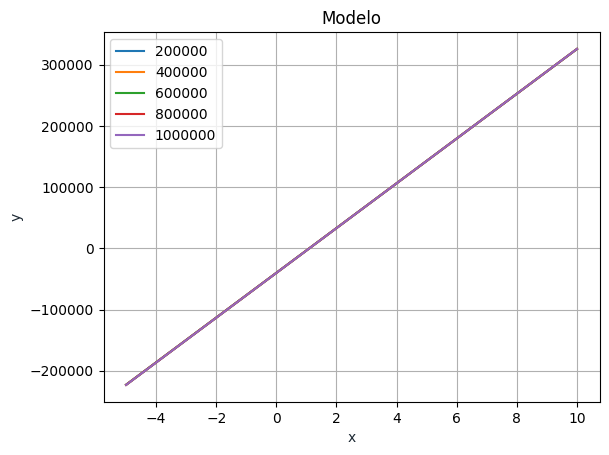

In [95]:
modelo.graficar_modelo(200000)

#### ScikitLearn

In [96]:
vector_x, vector_y = modelo.get_trainning_arrays('OverallQual')
vector_x_test, vector_y_test = modelo.get_testing_arrays('OverallQual')

In [97]:
betas_scikit, error_scikit = modelo.entrar_con_scikit(vector_x, vector_y, vector_x_test, vector_y_test)
print(f'betas_scikit: {betas_scikit}')
print(f'error_scikit: {error_scikit}')

betas_scikit: [-96469.57131873941, 45411.99877915909]
error_scikit: 0.6077497891131334


#### Estimacion entre Manual y ScikitLearn

In [98]:
# Estimacion
betas_manual = betas[len(betas) - 1]
betas_manual = betas_manual[::-1]
betas_scikit = betas_scikit[::-1]

In [99]:
muestra_x = modelo.get_muestra_x('OverallQual')
y_manual, y_scikit, y_promedio = modelo.estimar_modelos(betas_manual, betas_scikit, muestra_x)

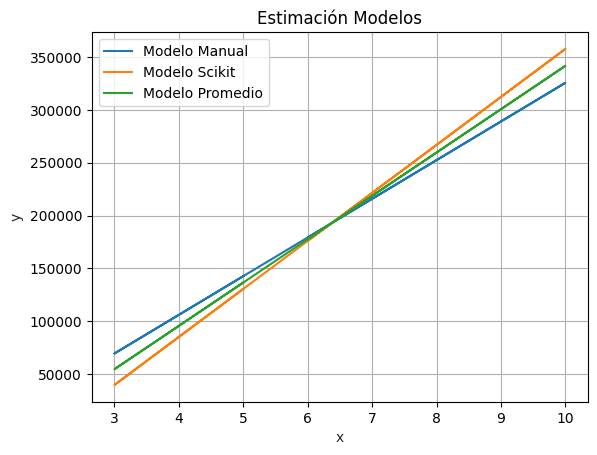

In [100]:
modelo.graficar_estimacion_modelos(muestra_x, y_manual, y_scikit, y_promedio)

### Entrenamiento de modelo con variable 1stFlrSF

### Manual

In [105]:
modelo = ModeloLineal(data_path, 0.80)
vector_x, vector_y = modelo.get_trainning_arrays('1stFlrSF')
modelo.set_betas(-4, 5)

In [108]:
betas, error = modelo.entrar_modelo(vector_x, vector_y, 10, 5, 0.2)

El error es de: 1.2865762588691055e+76
El error es de: 3.02076571389976e+158


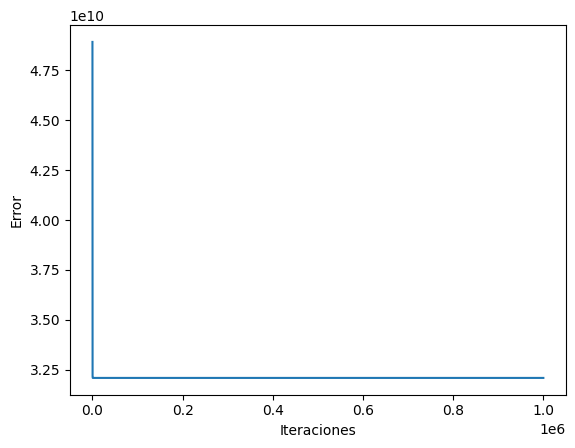

In [68]:
modelo.graficar_error()

c:\Users\sguzman\Documents\Universidad\CienciaPython\proyecto-regresion\modelo_lineal.py:135: RuntimeWarning: invalid value encountered in multiply
  y = row[1] * x + row[0]
c:\Users\sguzman\Documents\Universidad\CienciaPython\proyecto-regresion\modelo_lineal.py:135: RuntimeWarning: invalid value encountered in add
  y = row[1] * x + row[0]


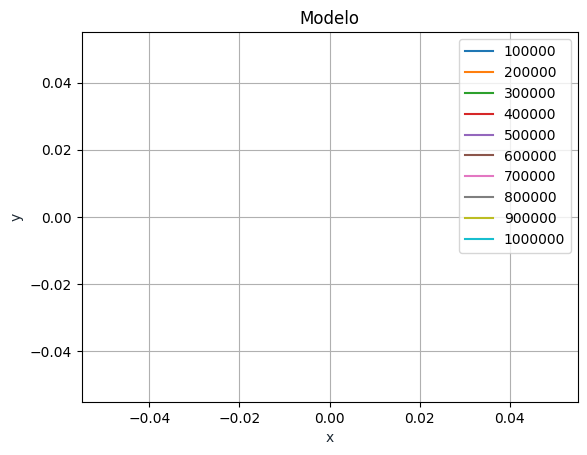

In [107]:
modelo.graficar_modelo(100000)

#### ScikitLearn

In [109]:
vector_x, vector_y = modelo.get_trainning_arrays('1stFlrSF')
vector_x_test, vector_y_test = modelo.get_testing_arrays('1stFlrSF')

In [110]:
betas_scikit, error_scikit = modelo.entrar_con_scikit(vector_x, vector_y, vector_x_test, vector_y_test)
print(f'betas_scikit: {betas_scikit}')
print(f'error_scikit: {error_scikit}')

betas_scikit: [30324.585174963722, 129.9512422871571]
error_scikit: 0.3161393626594352


#### Estimacion entre manual y ScikitLearn

In [73]:
# Estimacion
betas_manual = betas[len(betas) - 1]
betas_manual = betas_manual[::-1]
betas_scikit = betas_scikit[::-1]

[-495.66863133507115, 829203.6141256093]

In [75]:
muestra_x = modelo.get_muestra_x('1stFlrSF')
y_manual, y_scikit, y_promedio = modelo.estimar_modelos(betas_manual, betas_scikit, muestra_x)

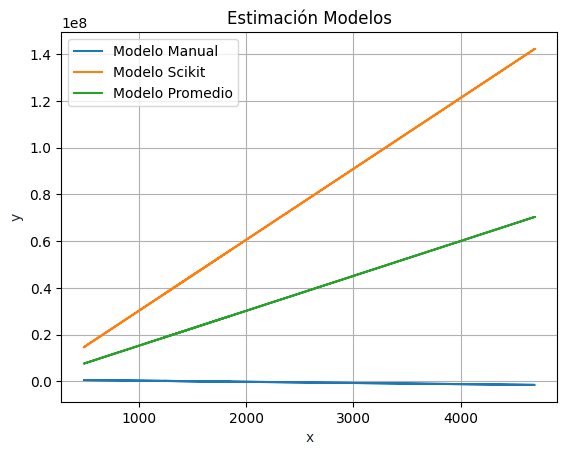

In [76]:
modelo.graficar_estimacion_modelos(muestra_x, y_manual, y_scikit, y_promedio)